In [ ]:
import pandas as pd

In [ ]:
file_path1 = 'Medicare_Spending_Per_Patient.csv'
df1 = pd.read_csv(file_path1)

file_path2 = 'Hospital_Data.csv'
df2 = pd.read_csv(file_path2)

file_path3 = 'Agency_for_Healthcare_Research_and_Quality.csv'
df3 = pd.read_csv(file_path3)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3320 entries, 0 to 3319
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Provider ID                                  3320 non-null   int64  
 1   Hospital Name                                3320 non-null   object 
 2   Address 1                                    3320 non-null   object 
 3   Address 2                                    0 non-null      float64
 4   Address 3                                    0 non-null      float64
 5   City                                         3320 non-null   object 
 6   State                                        3320 non-null   object 
 7   ZIP Code                                     3320 non-null   int64  
 8   County                                       3320 non-null   object 
 9   Phone Number                                 3320 non-null   int64  
 10  

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4859 entries, 0 to 4858
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Provider ID         4859 non-null   object 
 1   Hospital Name       4859 non-null   object 
 2   Address 1           4859 non-null   object 
 3   Address 2           0 non-null      float64
 4   Address 3           0 non-null      float64
 5   City                4859 non-null   object 
 6   State               4859 non-null   object 
 7   ZIP Code            4859 non-null   int64  
 8   County              4727 non-null   object 
 9   Phone Number        4859 non-null   int64  
 10  Hospital Type       4859 non-null   object 
 11  Hospital Ownership  4859 non-null   object 
 12  Emergency Services  4859 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 493.6+ KB


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4677 entries, 0 to 4676
Data columns (total 46 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Provider ID                                                                    4677 non-null   int64  
 1   Hospital Name                                                                  4677 non-null   object 
 2   Address 1                                                                      4677 non-null   object 
 3   Address 2                                                                      0 non-null      float64
 4   Address 3                                                                      0 non-null      float64
 5   City                                                                           4677 non-null   object 
 6   State                   

In [ ]:
df2['Provider ID'] = pd.to_numeric(df2['Provider ID'], errors='coerce')

In [ ]:
merged_df1_df2 = pd.merge(df1, df2, on='Provider ID', how='inner', suffixes=('df1', 'df2'))

In [ ]:
merged_df1_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3320 entries, 0 to 3319
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Provider ID                                  3320 non-null   int64  
 1   Hospital Namedf1                             3320 non-null   object 
 2   Address 1df1                                 3320 non-null   object 
 3   Address 2df1                                 0 non-null      float64
 4   Address 3df1                                 0 non-null      float64
 5   Citydf1                                      3320 non-null   object 
 6   Statedf1                                     3320 non-null   object 
 7   ZIP Codedf1                                  3320 non-null   int64  
 8   Countydf1                                    3320 non-null   object 
 9   Phone Numberdf1                              3320 non-null   int64  
 10  

In [ ]:
merged_df1_df2.to_csv('Merged(Hospital Data & Medicare Spending).csv', index=False)

In [ ]:
merged_df1_df2.head()

,Provider ID,Hospital Namedf1,Address 1df1,Address 2df1,Address 3df1,Citydf1,Statedf1,ZIP Codedf1,Countydf1,Phone Numberdf1,...,Address 2df2,Address 3df2,Citydf2,Statedf2,ZIP Codedf2,Countydf2,Phone Numberdf2,Hospital Type,Hospital Ownership,Emergency Services
0,330270,HOSPITAL FOR SPECIAL SURGERY,535 EAST 70TH STREET,NaN,NaN,NEW YORK,NY,10021,NEW YORK,2126061000,...,NaN,NaN,NEW YORK,NY,10021,NEW YORK,2126061000,Acute Care Hospitals,Voluntary non-profit - Private,Yes
1,420091,CAROLINAS HOSPITAL SYSTEM,805 PAMPLICO HWY BOX 100550,NaN,NaN,FLORENCE,SC,29505,FLORENCE,8436742500,...,NaN,NaN,FLORENCE,SC,29505,FLORENCE,8436742500,Acute Care Hospitals,Voluntary non-profit - Other,Yes
2,340147,NASH GENERAL HOSPITAL,2460 CURTIS ELLIS DRIVE,NaN,NaN,ROCKY MOUNT,NC,27804,NASH,2524438000,...,NaN,NaN,ROCKY MOUNT,NC,27804,NASH,2524438000,Acute Care Hospitals,Government - Hospital District or Authority,Yes
3,140053,ST JOHNS HOSPITAL,800 E CARPENTER ST,NaN,NaN,SPRINGFIELD,IL,62769,SANGAMON,2175446464,...,NaN,NaN,SPRINGFIELD,IL,62769,SANGAMON,2175446464,Acute Care Hospitals,Voluntary non-profit - Church,Yes
4,50485,LONG BEACH MEMORIAL MEDICAL CENTER,2801 ATLANTIC AVE,NaN,NaN,LONG BEACH,CA,90806,LOS ANGELES,5629332000,...,NaN,NaN,LONG BEACH,CA,90806,LOS ANGELES,5629332000,Acute Care Hospitals,Voluntary non-profit - Other,Yes


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
merged_df1_df2.columns

Index(['Provider ID', 'Hospital Namedf1', 'Address 1df1', 'Address 2df1',
       'Address 3df1', 'Citydf1', 'Statedf1', 'ZIP Codedf1', 'Countydf1',
       'Phone Numberdf1', 'Measure',
       'Spending per Hospital Patient with Medicare', 'Footnote',
       'Hospital Namedf2', 'Address 1df2', 'Address 2df2', 'Address 3df2',
       'Citydf2', 'Statedf2', 'ZIP Codedf2', 'Countydf2', 'Phone Numberdf2',
       'Hospital Type', 'Hospital Ownership', 'Emergency Services'],
      dtype='object')

In [ ]:
X = merged_df1_df2.loc[:, merged_df1_df2.columns != 'Spending per Hospital Patient with Medicare']
X = X.select_dtypes(include=[np.number])
X=X.fillna(0)
y = merged_df1_df2['Spending per Hospital Patient with Medicare']
y = pd.to_numeric(y, errors='coerce')
y=y.fillna(0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

# Display the coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

Mean Absolute Error: 0.08342039115560194
Mean Squared Error: 0.026131618565421465
Root Mean Squared Error: 0.16165277159832883
           Feature   Coefficient
0      Provider ID -4.356908e-08
1     Address 2df1 -1.458713e-19
2     Address 3df1  1.464110e-22
3      ZIP Codedf1 -2.932778e-07
4  Phone Numberdf1 -3.303332e-11
5     Address 2df2  0.000000e+00
6     Address 3df2  0.000000e+00
7      ZIP Codedf2 -2.932778e-07
8  Phone Numberdf2  3.763103e-11


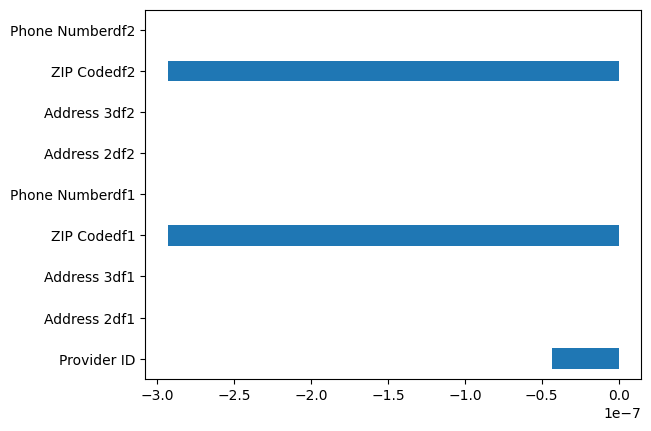

In [ ]:
feature_importance = pd.Series(model.coef_, index=X.columns)
feature_importance.plot(kind='barh')
plt.show()

Mean Absolute Error: 0.054921705909659044
Mean Squared Error: 0.005899007393883442
Root Mean Squared Error: 0.07680499589143562
                                              Feature  Coefficient
0   Hospital Ownership_Government - Hospital Distr...     0.098675
1               Hospital Ownership_Government - Local     0.080497
2               Hospital Ownership_Government - State     0.090054
3                        Hospital Ownership_Physician     0.112586
4                      Hospital Ownership_Proprietary     0.142232
5    Hospital Ownership_Voluntary non-profit - Church     0.121347
6     Hospital Ownership_Voluntary non-profit - Other     0.104128
7   Hospital Ownership_Voluntary non-profit - Private     0.115511
8                              Emergency Services_Yes     0.040204
9                                         Statedf1_AL     0.189917
10                                        Statedf1_AR     0.178088
11                                        Statedf1_AZ     0.147935
1

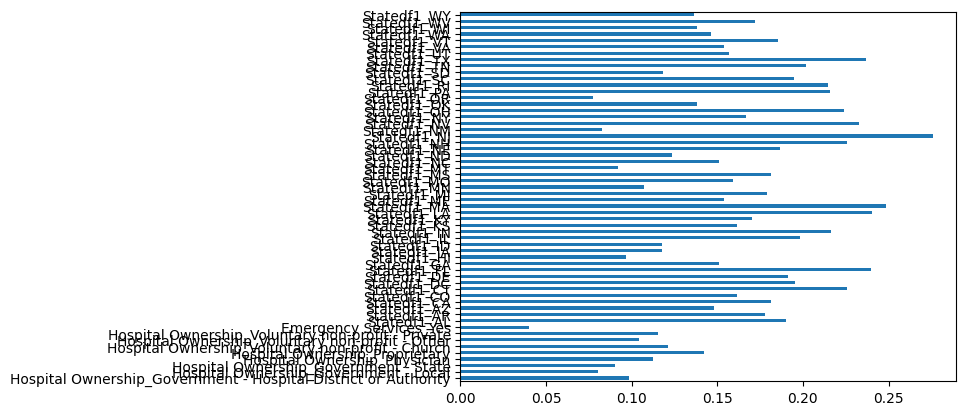

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load your dataset
# Replace 'your_dataset.csv' with the actual file path or URL of your dataset

data = pd.read_csv('Merged(Hospital Data & Medicare Spending).csv')
# Select relevant columns for analysis
# Adjust column names accordingly
"""'Provider ID', 'Hospital Namedf1', 'Address 1df1', 'Address 2df1',
       'Address 3df1', 'Citydf1', 'Statedf1', 'ZIP Codedf1', 'Countydf1',
       'Phone Numberdf1', 'Measure',
       'Spending per Hospital Patient with Medicare', 'Footnote',
       'Hospital Namedf2', 'Address 1df2', 'Address 2df2', 'Address 3df2',
       'Citydf2', 'Statedf2', 'ZIP Codedf2', 'Countydf2', 'Phone Numberdf2',
       'Hospital Type', 'Hospital Ownership', 'Emergency Services']"""


selected_columns = ['Hospital Type', 'Hospital Ownership', 'Emergency Services', 'Statedf1','Spending per Hospital Patient with Medicare']
df = data[selected_columns]

# Handle missing values
df = df.replace('Not Available', pd.NA)  # Replace 'Not Available' with NaN
df = df.dropna()  # Drop rows with missing values


# Handle categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['Hospital Type', 'Hospital Ownership', 'Emergency Services', 'Statedf1'], drop_first=True)

# Split the data into features (X) and the target variable (y)
X = df.drop('Spending per Hospital Patient with Medicare', axis=1)
y = df['Spending per Hospital Patient with Medicare']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

# Display the coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

# Feature importance (optional)
feature_importance = pd.Series(model.coef_, index=X.columns)
feature_importance.plot(kind='barh')
plt.show()


In [ ]:
import pandas as pd

# Load your dataset
# Replace 'your_dataset.csv' with the actual file path or URL of your dataset
data = pd.read_csv('/content/Merged(Hospital Data & Medicare Spending).csv')

# Select relevant columns for analysis
# Adjust column names accordingly
selected_columns = ['Hospital Namedf1', 'Statedf1', 'Spending per Hospital Patient with Medicare']
df = data[selected_columns]

# Handle missing values
df = df.replace('Not Available', pd.NA)  # Replace 'Not Available' with NaN
df = df.dropna(subset=['Spending per Hospital Patient with Medicare'])  # Drop rows with missing spending values

# Convert spending column to numeric
df['Spending per Hospital Patient with Medicare'] = pd.to_numeric(df['Spending per Hospital Patient with Medicare'], errors='coerce')

# Group data by state
grouped_by_state = df.groupby('Statedf1')

# Find best and worst hospitals in each state based on mean spending
best_hospitals = grouped_by_state.apply(lambda group: group.nlargest(1, 'Spending per Hospital Patient with Medicare'))
worst_hospitals = grouped_by_state.apply(lambda group: group.nsmallest(1, 'Spending per Hospital Patient with Medicare'))

# Investigate reasons
# You may want to explore additional features or columns in the dataset to understand the reasons
# For example: hospital type, ownership, emergency services, etc.

# Display results
print("Best Hospitals:")
print(best_hospitals)

print("\nWorst Hospitals:")
print(worst_hospitals)

Best Hospitals:
                                                Hospital Namedf1 Statedf1  \
Statedf1                                                                    
AK       1780                 CENTRAL PENINSULA GENERAL HOSPITAL       AK   
AL       2929                              J PAUL JONES HOSPITAL       AL   
AR       3180                         NORTH METRO MEDICAL CENTER       AR   
AZ       2723               ARIZONA ORTHOPEDIC SURGICAL HOSPITAL       AZ   
CA       1698                EAST VALLEY HOSPITAL MEDICAL CENTER       CA   
CO       1631                      MEDICAL CENTER OF AURORA, THE       CO   
CT       2454                               NEW MILFORD HOSPITAL       CT   
DC       2234                              UNITED MEDICAL CENTER       DC   
DE       48                    BAYHEALTH - KENT GENERAL HOSPITAL       DE   
FL       1879               WUESTHOFF MEDICAL CENTER - MELBOURNE       FL   
GA       1861                             TURNING POINT HOSP

In [ ]:
df3.head()

,Provider ID,Hospital Name,Address 1,Address 2,Address 3,City,State,ZIP Code,County,Phone Number,...,Lower Estimate - A wound that splits open after surgery,Higher Estimate - A wound that splits open after surgery,Number of Patients - Accidental cuts and tears from medical treatment,Rate - Accidental cuts and tears from medical treatment,Lower Estimate - Accidental cuts and tears from medical treatment,Higher Estimate - Accidental cuts and tears from medical treatment,Number of Patients - Serious Complications,Rate - Serious Complications,Lower Estimate - Serious Complications,Higher Estimate - Serious Complications
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,NaN,NaN,DOTHAN,AL,36301,HOUSTON,3347938701,...,0,1.9,15415,3.07,2.28,3.86,Not Available,0.68,0.52,0.84
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,NaN,NaN,BOAZ,AL,35957,MARSHALL,2565938310,...,0,2.59,4224,1.58,0.08,3.09,Not Available,0.48,0.16,0.79
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,NaN,NaN,FLORENCE,AL,35631,LAUDERDALE,2567688400,...,0,2.97,10672,2.94,1.91,3.96,Not Available,0.8,0.59,1.02
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,NaN,NaN,OPP,AL,36467,COVINGTON,3344933541,...,0,3.05,1878,2.06,0.05,4.07,Not Available,0.64,0.23,1.05
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,NaN,NaN,LUVERNE,AL,36049,CRENSHAW,3343353374,...,Not Available,Not Available,752,1.68,0,3.98,Not Available,0.57,0.1,1.04


In [ ]:
df3.columns

Index(['Provider ID', 'Hospital Name', 'Address 1', 'Address 2', 'Address 3',
       'City', 'State', 'ZIP Code', 'County', 'Phone Number',
       'Death from serious treatable complications after surgery',
       'Footnote - Death from serious treatable complications after surgery',
       'Collapsed lung due to medical treatment',
       'Footnote - Collapsed lung due to medical treatment',
       'Serious blood clots after surgery',
       'Footnote - Serious blood clots after surgery',
       'A wound that splits open after surgery',
       'Footnote - A wound that splits open after surgery',
       'Accidental cuts and tears from medical treatment',
       'Footnote - Accidental cuts and tears from medical treatment',
       'Serious Complications', 'Footnote - Serious Complications',
       'Number of Patients - Death from serious treatable complications after surgery',
       'Rate - Death from serious treatable complications after surgery',
       'Lower Estimate - Death from s

In [ ]:
import pandas as pd

# Load the Quality Metrics Dataset
# Replace 'Agency for Healthcare Research and Quality.csv' with the actual file path or URL
quality_data = pd.read_csv('/content/Agency_for_Healthcare_Research_and_Quality.csv')

numeric_columns = [
    'Number of Patients - Death from serious treatable complications after surgery',
    'Number of Patients - Collapsed lung due to medical treatment',
    'Number of Patients - Serious blood clots after surgery',
    'Number of Patients - A wound that splits open after surgery',
    'Number of Patients - Accidental cuts and tears from medical treatment',
    'Number of Patients - Serious Complications'
]

quality_data[numeric_columns] = quality_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Define Quality Groups based on specific criteria
def define_quality_group(row):
    # Specify the columns to consider for the number of patients threshold
    relevant_columns = [
        'Number of Patients - Death from serious treatable complications after surgery',
        'Number of Patients - Collapsed lung due to medical treatment',
        'Number of Patients - Serious blood clots after surgery',
        'Number of Patients - A wound that splits open after surgery',
        'Number of Patients - Accidental cuts and tears from medical treatment',
        'Number of Patients - Serious Complications'
    ]

    # Specify the columns and condition for 'Worse than U.S. National Rate'
    worse_than_national_rate_condition = (
        row['Death from serious treatable complications after surgery'] == 'Worse than U.S. National Rate' or
        row['Collapsed lung due to medical treatment'] == 'Worse than U.S. National Rate' or
        row['A wound that splits open after surgery'] == 'Worse than U.S. National Rate' or
        row['Serious Complications'] == 'Worse than U.S. National Rate'
    )

    # Check if the number of patients is >= 100 for any relevant complication or if it's worse than U.S. National Rate
    if any(row[column] >= 100 for column in relevant_columns) or worse_than_national_rate_condition:
        return 'High Risk'
    else:
        return 'Low Risk'

# Apply the grouping function to create a new column 'Quality Group'
quality_data['Quality Group'] = quality_data.apply(define_quality_group, axis=1)

# Analyze and Interpret Results
group_counts = quality_data['Quality Group'].value_counts()
print("Hospital Quality Groups:")
print(group_counts)

Hospital Quality Groups:
High Risk    3240
Low Risk     1437
Name: Quality Group, dtype: int64


In [ ]:

# Load your datasets
# Replace 'spending_data.csv' and 'quality_data.csv' with the actual file paths or URLs of your datasets
spending_data = pd.read_csv('/content/Merged(Hospital Data & Medicare Spending).csv')
quality_data = pd.read_csv('/content/Agency_for_Healthcare_Research_and_Quality.csv')

# Assuming there is a common identifier, such as 'Provider ID' or 'Hospital Name', merge the datasets
merged_data = pd.merge(spending_data, quality_data, on='Provider ID', how='inner')

merged_data['Spending per Hospital Patient with Medicare'] = pd.to_numeric(merged_data['Spending per Hospital Patient with Medicare'], errors='coerce')

merged_data['Lower Estimate - Serious Complications'] = pd.to_numeric(merged_data['Lower Estimate - Serious Complications'], errors='coerce')

# Select relevant columns for analysis
# Adjust column names accordingly
spending_column = 'Spending per Hospital Patient with Medicare'
quality_metric_column = 'Lower Estimate - Serious Complications'

# Calculate the correlation coefficient
correlation_coefficient = merged_data[spending_column].corr(merged_data[quality_metric_column])

# Print the correlation coefficient
print(f"Correlation Coefficient between Spending and Quality: {correlation_coefficient}")

Correlation Coefficient between Spending and Quality: 0.12236634601584499


In [ ]:
import pandas as pd

# Choose the common columns for joining
common_cols = ["Hospital Name", "Address 1", "Address 2", "Address 3", "City", "State", "ZIP Code", "Phone Number"]

# Merge the datasets using the common columns
merged_df = pd.merge(df1, df2, how="inner", on=common_cols)

# Now, you can analyze the merged dataframe to explain variance in spending
# For example, you can use correlation, statistical tests, or visualizations

# Example: Correlation between spending and other numeric columns
correlation_matrix = merged_df.corr()
print(correlation_matrix["Spending per Hospital Patient with Medicare"])

# Example: Visualizing the relationship between spending and a specific column
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="Hospital Type", y="Spending per Hospital Patient with Medicare", data=merged_df)
plt.show()

# Check if the column exists before calculating correlation
column_name = 'Spending per Hospital Patient with Medicare'
if column_name in merged_df.columns:
    correlation_matrix = merged_df.corr()
else:
    print(f"Column '{column_name}' not found in DataFrame.")

<ipython-input-26-a6f41d2c1560>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


KeyError: ignored

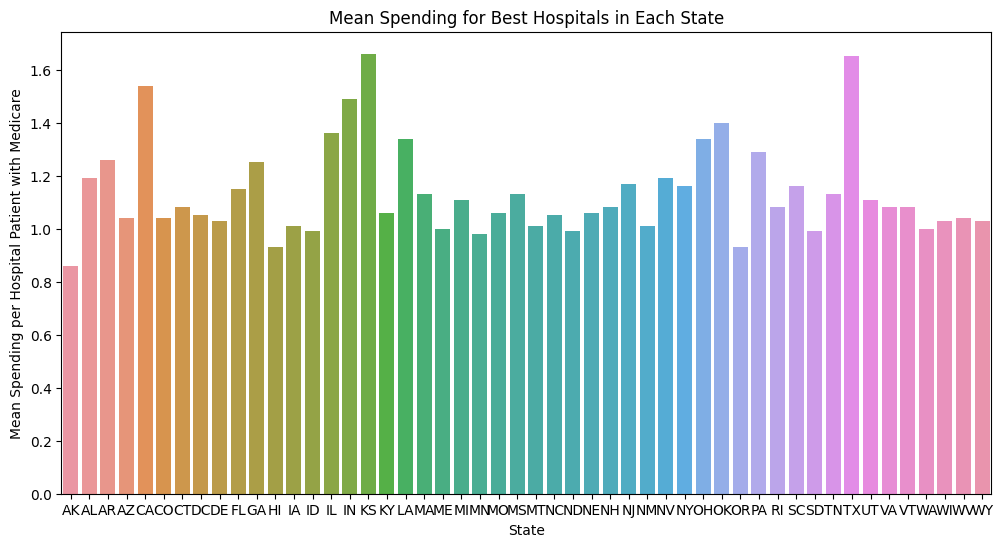

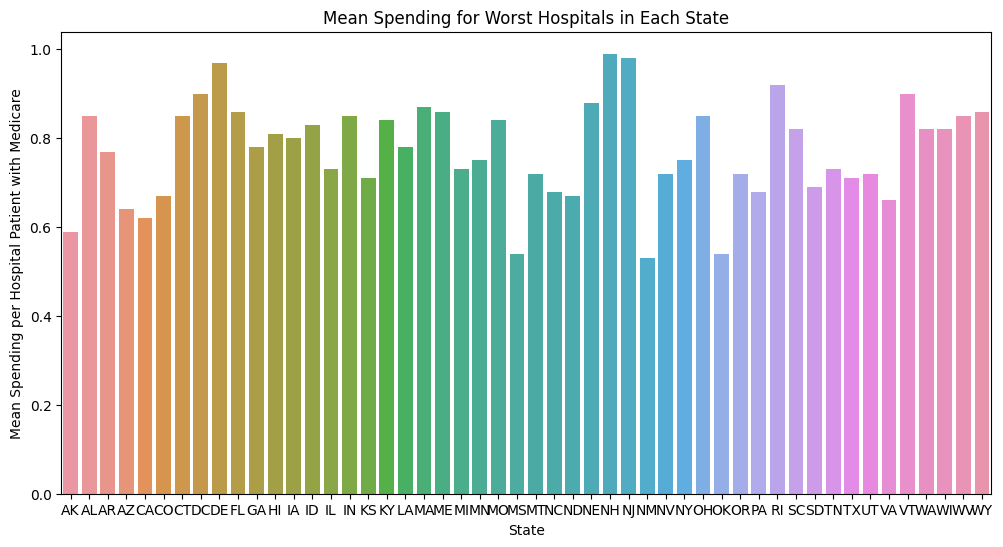

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (your code for loading and preparing the data)

# Group data by state
grouped_by_state = df.groupby('Statedf1')

# Find best and worst hospitals in each state based on mean spending
best_hospitals = grouped_by_state.apply(lambda group: group.nlargest(1, 'Spending per Hospital Patient with Medicare'))
worst_hospitals = grouped_by_state.apply(lambda group: group.nsmallest(1, 'Spending per Hospital Patient with Medicare'))

# Store the best and worst hospitals outside the function
best_hospitals = best_hospitals.reset_index(drop=True)
worst_hospitals = worst_hospitals.reset_index(drop=True)

# Visualization for Best Hospitals
plt.figure(figsize=(12, 6))
sns.barplot(x='Statedf1', y='Spending per Hospital Patient with Medicare', data=best_hospitals)
plt.title('Mean Spending for Best Hospitals in Each State')
plt.xlabel('State')
plt.ylabel('Mean Spending per Hospital Patient with Medicare')
plt.show()

# Visualization for Worst Hospitals
plt.figure(figsize=(12, 6))
sns.barplot(x='Statedf1', y='Spending per Hospital Patient with Medicare', data=worst_hospitals)
plt.title('Mean Spending for Worst Hospitals in Each State')
plt.xlabel('State')
plt.ylabel('Mean Spending per Hospital Patient with Medicare')
plt.show()

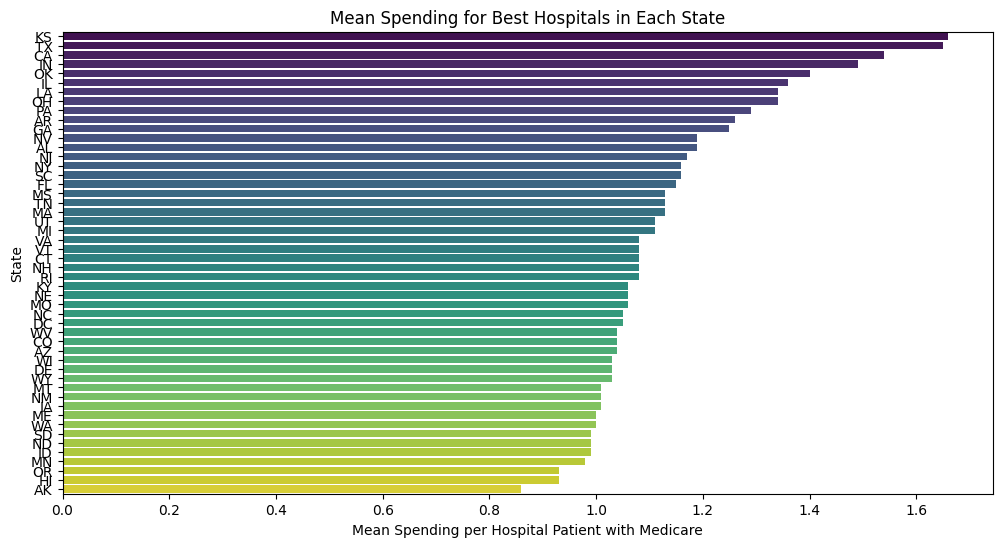

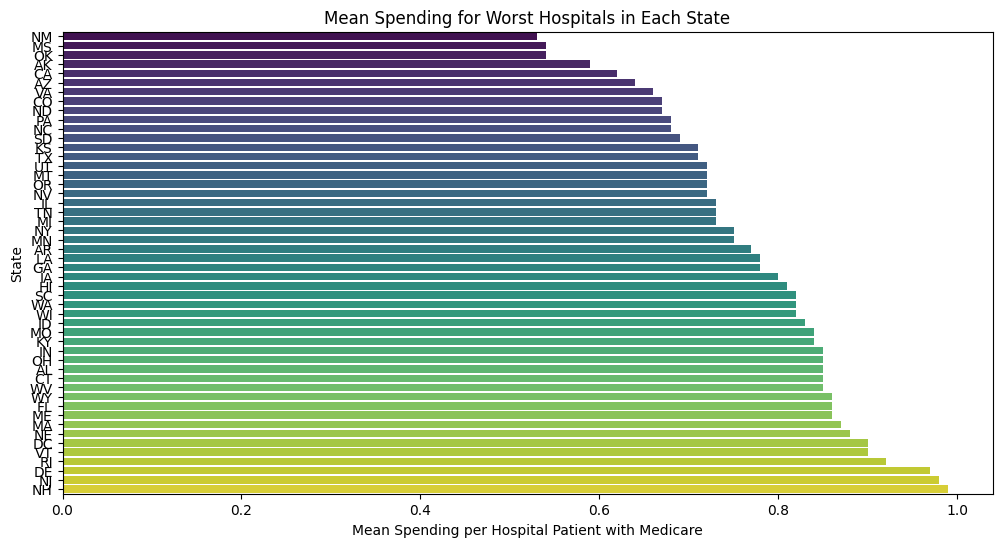

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (your code for loading and preparing the data)

# Group data by state
grouped_by_state = df.groupby('Statedf1')

# Find best and worst hospitals in each state based on mean spending
best_hospitals = grouped_by_state.apply(lambda group: group.nlargest(1, 'Spending per Hospital Patient with Medicare'))
worst_hospitals = grouped_by_state.apply(lambda group: group.nsmallest(1, 'Spending per Hospital Patient with Medicare'))

# Store the best and worst hospitals outside the function
best_hospitals = best_hospitals.reset_index(drop=True)
worst_hospitals = worst_hospitals.reset_index(drop=True)

# Sort the DataFrames by mean spending for better visualization
best_hospitals = best_hospitals.sort_values(by='Spending per Hospital Patient with Medicare', ascending=False)
worst_hospitals = worst_hospitals.sort_values(by='Spending per Hospital Patient with Medicare', ascending=True)

# Visualization for Best Hospitals
plt.figure(figsize=(12, 6))
sns.barplot(x='Spending per Hospital Patient with Medicare', y='Statedf1', data=best_hospitals, palette='viridis')
plt.title('Mean Spending for Best Hospitals in Each State')
plt.xlabel('Mean Spending per Hospital Patient with Medicare')
plt.ylabel('State')
plt.show()

# Visualization for Worst Hospitals
plt.figure(figsize=(12, 6))
sns.barplot(x='Spending per Hospital Patient with Medicare', y='Statedf1', data=worst_hospitals, palette='viridis')
plt.title('Mean Spending for Worst Hospitals in Each State')
plt.xlabel('Mean Spending per Hospital Patient with Medicare')
plt.ylabel('State')
plt.show()

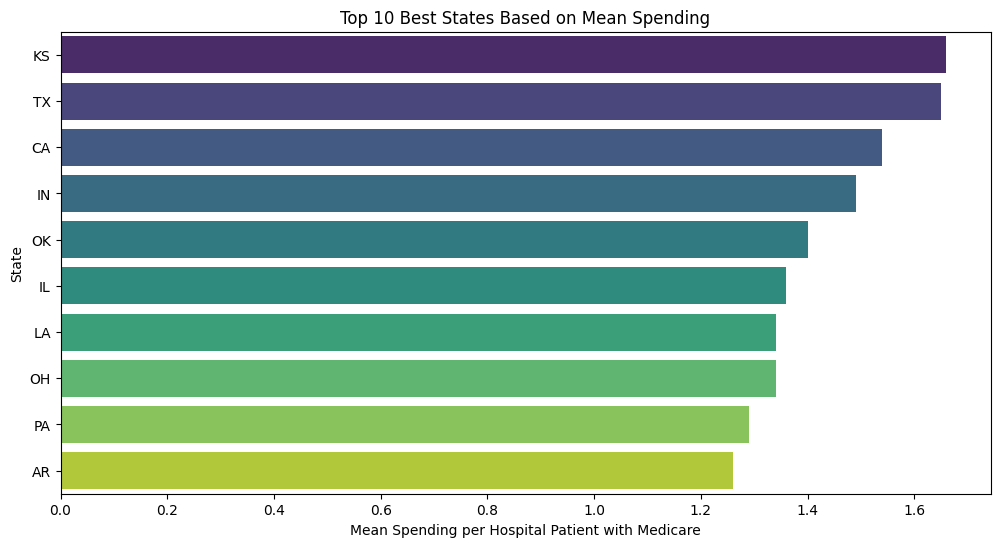

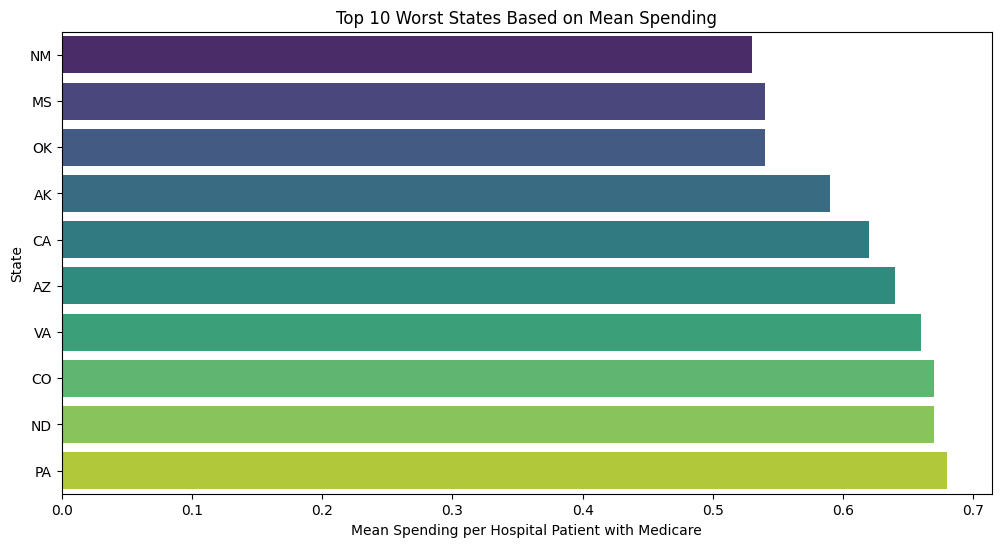

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (your code for loading and preparing the data)

# Group data by state
grouped_by_state = df.groupby('Statedf1')

# Find best and worst hospitals in each state based on mean spending
best_hospitals = grouped_by_state.apply(lambda group: group.nlargest(1, 'Spending per Hospital Patient with Medicare'))
worst_hospitals = grouped_by_state.apply(lambda group: group.nsmallest(1, 'Spending per Hospital Patient with Medicare'))

# Store the best and worst hospitals outside the function
best_hospitals = best_hospitals.reset_index(drop=True)
worst_hospitals = worst_hospitals.reset_index(drop=True)

# Sort the DataFrames by mean spending for better visualization
best_hospitals = best_hospitals.sort_values(by='Spending per Hospital Patient with Medicare', ascending=False)
worst_hospitals = worst_hospitals.sort_values(by='Spending per Hospital Patient with Medicare', ascending=True)

# Extract top 10 best and worst states
top_10_best_states = best_hospitals.head(10)
top_10_worst_states = worst_hospitals.head(10)

# Visualization for Top 10 Best States
plt.figure(figsize=(12, 6))
sns.barplot(x='Spending per Hospital Patient with Medicare', y='Statedf1', data=top_10_best_states, palette='viridis')
plt.title('Top 10 Best States Based on Mean Spending')
plt.xlabel('Mean Spending per Hospital Patient with Medicare')
plt.ylabel('State')
plt.show()

# Visualization for Top 10 Worst States
plt.figure(figsize=(12, 6))
sns.barplot(x='Spending per Hospital Patient with Medicare', y='Statedf1', data=top_10_worst_states, palette='viridis')
plt.title('Top 10 Worst States Based on Mean Spending')
plt.xlabel('Mean Spending per Hospital Patient with Medicare')
plt.ylabel('State')
plt.show()


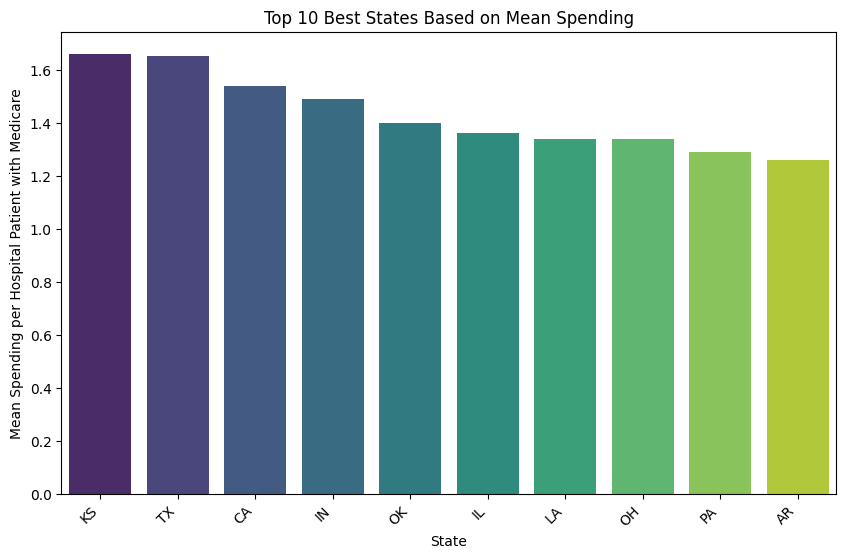

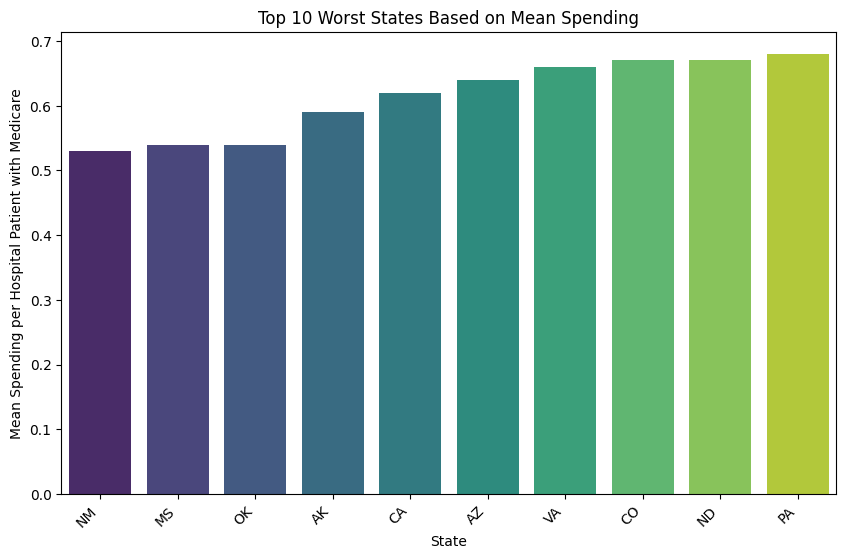

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (your code for loading and preparing the data)

# Group data by state
grouped_by_state = df.groupby('Statedf1')

# Find best and worst hospitals in each state based on mean spending
best_hospitals = grouped_by_state.apply(lambda group: group.nlargest(1, 'Spending per Hospital Patient with Medicare'))
worst_hospitals = grouped_by_state.apply(lambda group: group.nsmallest(1, 'Spending per Hospital Patient with Medicare'))

# Store the best and worst hospitals outside the function
best_hospitals = best_hospitals.reset_index(drop=True)
worst_hospitals = worst_hospitals.reset_index(drop=True)

# Sort the DataFrames by mean spending for better visualization
best_hospitals = best_hospitals.sort_values(by='Spending per Hospital Patient with Medicare', ascending=False)
worst_hospitals = worst_hospitals.sort_values(by='Spending per Hospital Patient with Medicare', ascending=True)

# Extract top 10 best and worst states
top_10_best_states = best_hospitals.head(10)
top_10_worst_states = worst_hospitals.head(10)

# Visualization for Top 10 Best States
plt.figure(figsize=(10, 6))
sns.barplot(x='Statedf1', y='Spending per Hospital Patient with Medicare', data=top_10_best_states, palette='viridis')
plt.title('Top 10 Best States Based on Mean Spending')
plt.xlabel('State')
plt.ylabel('Mean Spending per Hospital Patient with Medicare')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualization for Top 10 Worst States
plt.figure(figsize=(10, 6))
sns.barplot(x='Statedf1', y='Spending per Hospital Patient with Medicare', data=top_10_worst_states, palette='viridis')
plt.title('Top 10 Worst States Based on Mean Spending')
plt.xlabel('State')
plt.ylabel('Mean Spending per Hospital Patient with Medicare')
plt.xticks(rotation=45, ha='right')
plt.show()

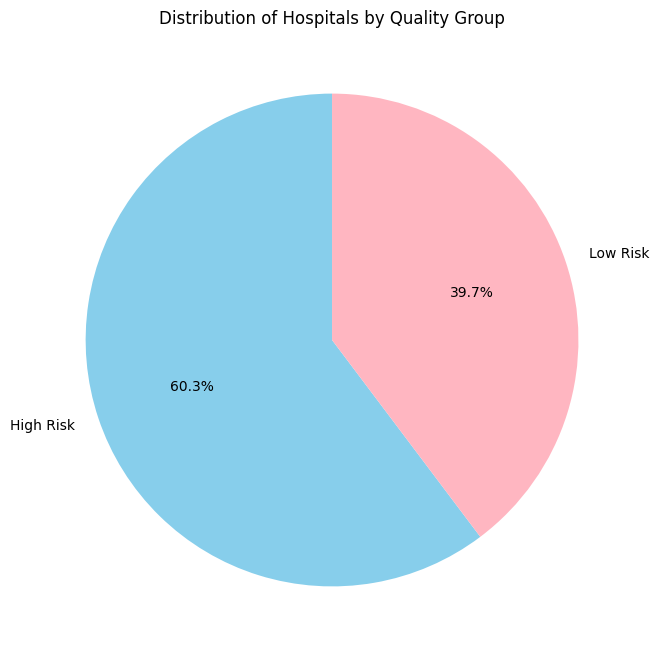

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd

# Load the Quality Metrics Dataset
# Replace 'Agency for Healthcare Research and Quality.csv' with the actual file path or URL
quality_data = pd.read_csv('/content/Agency_for_Healthcare_Research_and_Quality.csv')

numeric_columns = [
    'Number of Patients - Death from serious treatable complications after surgery',
    'Number of Patients - Collapsed lung due to medical treatment',
    'Number of Patients - Serious blood clots after surgery',
    'Number of Patients - A wound that splits open after surgery',
    'Number of Patients - Accidental cuts and tears from medical treatment',
    'Number of Patients - Serious Complications'
]

quality_data[numeric_columns] = quality_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Define Quality Groups based on specific criteria
# Define Quality Groups based on specific criteria
def define_quality_group(row):
    # Specify the columns to consider for the number of patients threshold
    relevant_columns = [
        'Number of Patients - Death from serious treatable complications after surgery',
        'Number of Patients - Collapsed lung due to medical treatment',
        'Number of Patients - Serious blood clots after surgery',
        'Number of Patients - A wound that splits open after surgery',
        'Number of Patients - Accidental cuts and tears from medical treatment',
        'Number of Patients - Serious Complications'
    ]

    # Specify the columns and condition for 'Worse than U.S. National Rate'
    worse_than_national_rate_condition = (
        row['Death from serious treatable complications after surgery'] == 'Worse than U.S. National Rate' or
        row['Collapsed lung due to medical treatment'] == 'Worse than U.S. National Rate' or
        row['A wound that splits open after surgery'] == 'Worse than U.S. National Rate' or
        row['Serious Complications'] == 'Worse than U.S. National Rate'
    )

    # Check if the number of patients is >= 1000 for any relevant complication or if it's worse than U.S. National Rate
    if any(row[column] >= 1000 for column in relevant_columns) or worse_than_national_rate_condition:
        return 'High Risk'
    else:
        return 'Low Risk'

# Apply the grouping function to create a new column 'Quality Group'
quality_data['Quality Group'] = quality_data.apply(define_quality_group, axis=1)

# Analyze and Interpret Results
group_counts = quality_data['Quality Group'].value_counts()

# Visualization for Quality Groups
plt.figure(figsize=(8, 8))
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightpink'])
plt.title('Distribution of Hospitals by Quality Group')
plt.show()

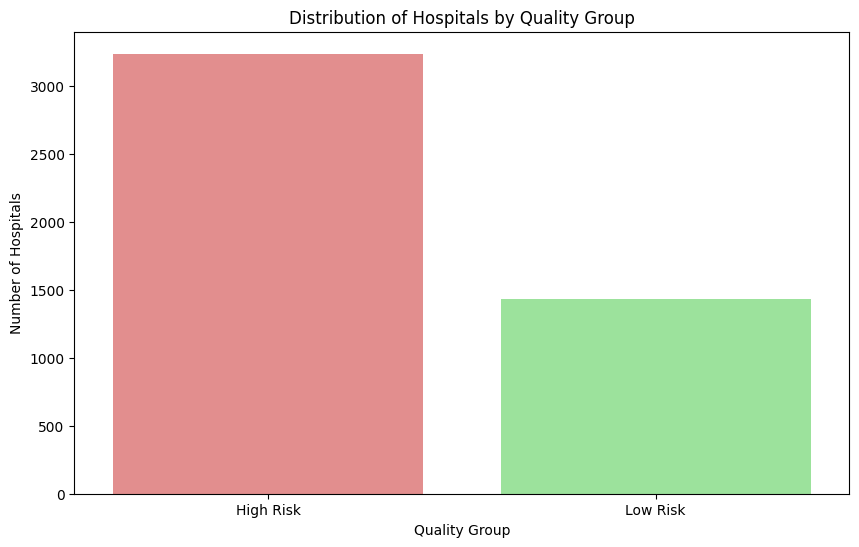

In [ ]:
# Visualization for Quality Groups (Bar Plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='Quality Group', data=quality_data, palette={'High Risk': 'lightcoral', 'Low Risk': 'lightgreen'})
plt.title('Distribution of Hospitals by Quality Group')
plt.xlabel('Quality Group')
plt.ylabel('Number of Hospitals')
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load your dataset
# Replace 'your_dataset.csv' with the actual file path or URL of your dataset

data = pd.read_csv('Merged(Hospital Data & Medicare Spending).csv')
# Select relevant columns for analysis
# Adjust column names accordingly
"""'Provider ID', 'Hospital Namedf1', 'Address 1df1', 'Address 2df1',
       'Address 3df1', 'Citydf1', 'Statedf1', 'ZIP Codedf1', 'Countydf1',
       'Phone Numberdf1', 'Measure',
       'Spending per Hospital Patient with Medicare', 'Footnote',
       'Hospital Namedf2', 'Address 1df2', 'Address 2df2', 'Address 3df2',
       'Citydf2', 'Statedf2', 'ZIP Codedf2', 'Countydf2', 'Phone Numberdf2',
       'Hospital Type', 'Hospital Ownership', 'Emergency Services']"""


selected_columns = ['Hospital Type', 'Hospital Ownership', 'Emergency Services', 'Statedf1','Spending per Hospital Patient with Medicare']
df = data[selected_columns]

# Handle missing values
df = df.replace('Not Available', pd.NA)  # Replace 'Not Available' with NaN
df = df.dropna()  # Drop rows with missing values


# Handle categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['Hospital Type', 'Hospital Ownership', 'Emergency Services', 'Statedf1'], drop_first=True)

# Split the data into features (X) and the target variable (y)
X = df.drop('Spending per Hospital Patient with Medicare', axis=1)
y = df['Spending per Hospital Patient with Medicare']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))


Mean Absolute Error: 0.054921705909659044
Mean Squared Error: 0.005899007393883442
Root Mean Squared Error: 0.07680499589143562


Mean Squared Error: 74.47269014803472
R^2 Score: -0.039882283123731765


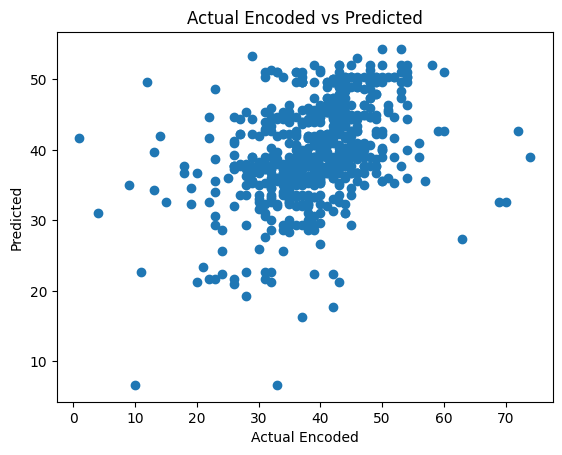

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming you have your data in X (features) and y (target variable)

# Encode the target variable 'y'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a KNN regression model
k = 3  # Number of neighbors to consider
knn_model = KNeighborsRegressor(n_neighbors=k)

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Optionally, visualize predictions against actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Encoded')
plt.ylabel('Predicted')
plt.title('Actual Encoded vs Predicted')
plt.show()

Ridge Regression Mean Squared Error: 57.15008298249163
Ridge Regression R-squared: 0.20199795852127655
Best alpha: 0.1


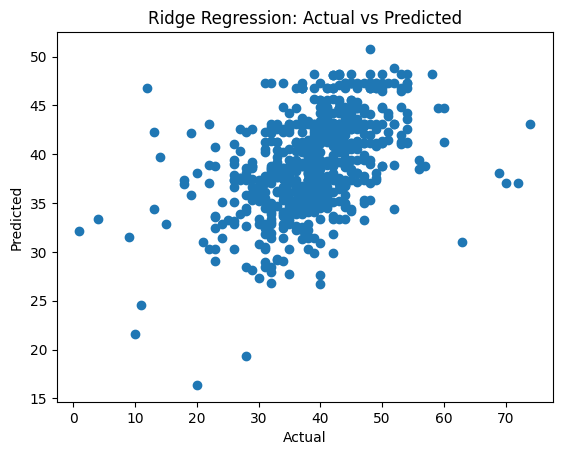

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# 1. Ridge Regression with Hyperparameter Tuning
ridge_model = Ridge()

# Hyperparameter tuning using GridSearchCV
param_grid = {'alpha': [0.1, 1, 10, 100]}  # Adjust the alpha values as needed
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best hyperparameter
best_alpha = grid_search.best_params_['alpha']

# Fit the Ridge model with the best hyperparameter
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
ridge_pred = ridge_model.predict(X_test)

# Evaluate the Ridge model
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print(f"Ridge Regression Mean Squared Error: {ridge_mse}")
print(f"Ridge Regression R-squared: {ridge_r2}")
print(f"Best alpha: {best_alpha}")

# Visualize predictions against actual values
plt.scatter(y_test, ridge_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression: Actual vs Predicted')
plt.show()

Lasso Regression Mean Squared Error: 63.51526895016912
Lasso Regression R-squared: 0.11311914800136025
Best alpha for Lasso: 0.1


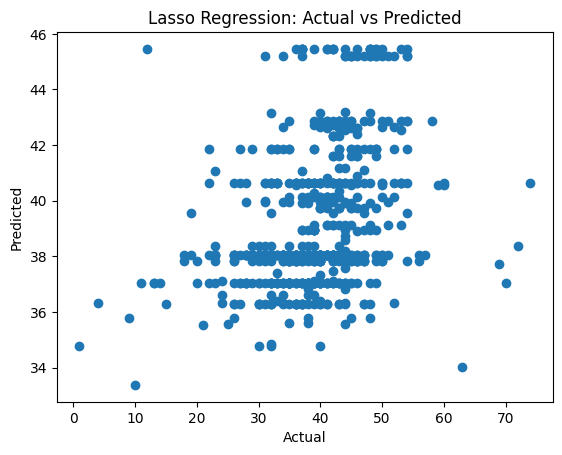

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# 1. Lasso Regression with Hyperparameter Tuning
lasso_model = Lasso()

# Hyperparameter tuning using GridSearchCV
param_grid = {'alpha': [0.1, 1, 10, 100]}  # Adjust the alpha values as needed
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best hyperparameter
best_alpha_lasso = grid_search.best_params_['alpha']

# Fit the Lasso model with the best hyperparameter
lasso_model = Lasso(alpha=best_alpha_lasso)
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
lasso_pred = lasso_model.predict(X_test)

# Evaluate the Lasso model
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print(f"Lasso Regression Mean Squared Error: {lasso_mse}")
print(f"Lasso Regression R-squared: {lasso_r2}")
print(f"Best alpha for Lasso: {best_alpha_lasso}")

# Visualize predictions against actual values
plt.scatter(y_test, lasso_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression: Actual vs Predicted')
plt.show()



Elastic Net Regression Mean Squared Error: 64.11570078752985
Elastic Net Regression R-squared: 0.10473515611582862
Best alpha for Elastic Net: 0.1
Best l1_ratio for Elastic Net: 0.9


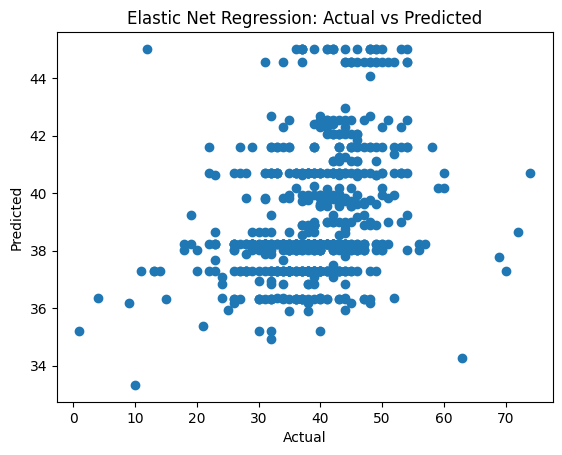

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# 1. Elastic Net Regression with Hyperparameter Tuning
elastic_net_model = ElasticNet()

# Hyperparameter tuning using GridSearchCV
param_grid = {'alpha': [0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.7, 0.9]}  # Adjust alpha and l1_ratio as needed
grid_search = GridSearchCV(elastic_net_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_alpha_en = grid_search.best_params_['alpha']
best_l1_ratio_en = grid_search.best_params_['l1_ratio']

# Fit the Elastic Net model with the best hyperparameters
elastic_net_model = ElasticNet(alpha=best_alpha_en, l1_ratio=best_l1_ratio_en)
elastic_net_model.fit(X_train, y_train)

# Make predictions on the test set
elastic_net_pred = elastic_net_model.predict(X_test)

# Evaluate the Elastic Net model
elastic_net_mse = mean_squared_error(y_test, elastic_net_pred)
elastic_net_r2 = r2_score(y_test, elastic_net_pred)

print(f"Elastic Net Regression Mean Squared Error: {elastic_net_mse}")
print(f"Elastic Net Regression R-squared: {elastic_net_r2}")
print(f"Best alpha for Elastic Net: {best_alpha_en}")
print(f"Best l1_ratio for Elastic Net: {best_l1_ratio_en}")

# Visualize predictions against actual values
plt.scatter(y_test, elastic_net_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Elastic Net Regression: Actual vs Predicted')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

SVR Mean Squared Error: 58.181330850452426
SVR R-squared: 0.18759836606302227


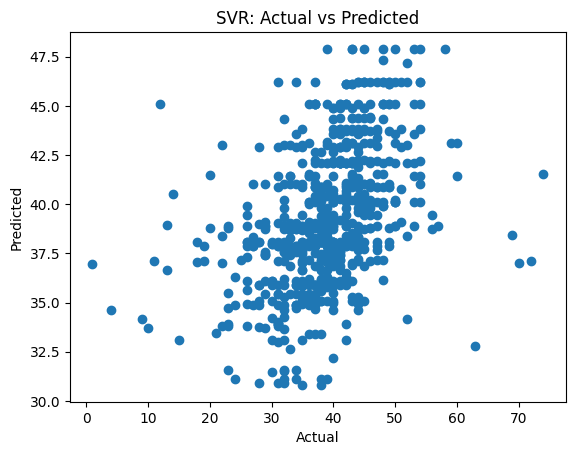

In [ ]:
# 4. Support Vector Regression (SVR)
svr_model = make_pipeline(StandardScaler(), SVR())
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)
print(f"SVR Mean Squared Error: {svr_mse}")
print(f"SVR R-squared: {svr_r2}")

# Visualize predictions against actual values
plt.scatter(y_test, svr_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR: Actual vs Predicted')
plt.show()

Gradient Boosting Mean Squared Error: 1512.0800088003016
Gradient Boosting R-squared: -20.113581484588067


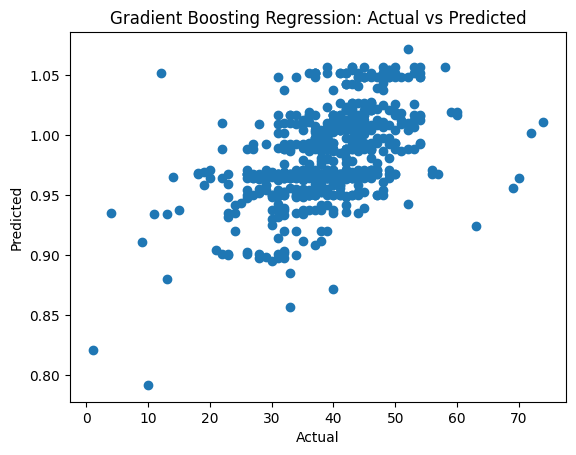

In [ ]:
# 5. Gradient Boosting Regression
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X, y)
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
print(f"Gradient Boosting Mean Squared Error: {gb_mse}")
print(f"Gradient Boosting R-squared: {gb_r2}")

# Visualize predictions against actual values
plt.scatter(y_test, gb_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting Regression: Actual vs Predicted')
plt.show()

Decision Tree Mean Squared Error: 59.773988084682074
Decision Tree R-squared: 0.16535966302071026
Best max_depth: None
Best min_samples_split: 2
Best min_samples_leaf: 4


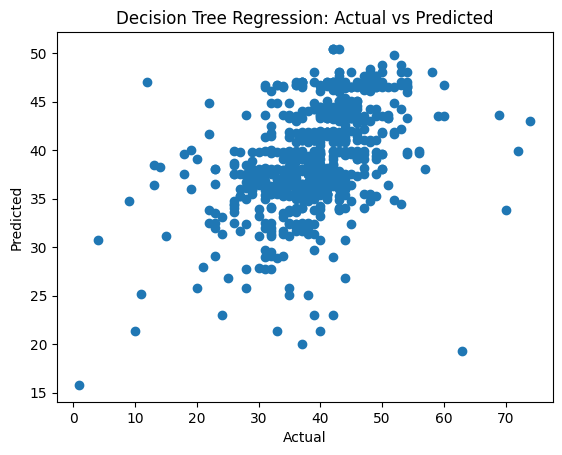

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# 2. Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']

# Fit the model with the best hyperparameters
dt_model = DecisionTreeRegressor(max_depth=best_max_depth, min_samples_split=best_min_samples_split,
                                 min_samples_leaf=best_min_samples_leaf, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt_model.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

print(f"Decision Tree Mean Squared Error: {dt_mse}")
print(f"Decision Tree R-squared: {dt_r2}")
print(f"Best max_depth: {best_max_depth}")
print(f"Best min_samples_split: {best_min_samples_split}")
print(f"Best min_samples_leaf: {best_min_samples_leaf}")


# Visualize predictions against actual values
plt.scatter(y_test, dt_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.show()


In [ ]:
# Create a dictionary to store the model results
results = {
    'Model': ['Ridge Regression', 'Lasso Regression','Elastic Net',  'Support Vector Regression', 'Gradient Boosting', 'Lasso', 'Elastic Net', 'KNN'],
    'R-squared': [ridge_r2,lasso_r2 ,elastic_net_r2, svr_r2, gb_r2, lasso_r2, elastic_net_r2, r2 ]
}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results)

# Print the table
print(results_df)

                       Model  R-squared
0           Ridge Regression   0.201998
1           Lasso Regression   0.113119
2                Elastic Net   0.104735
3  Support Vector Regression   0.187598
4          Gradient Boosting -20.113581
5                      Lasso   0.113119
6                Elastic Net   0.104735
7                        KNN  -0.039882


In [ ]:
pip install plotly

In [ ]:
import pandas as pd
import plotly.express as px

# Your existing code to create the results DataFrame
results = {
    'Model': ['Ridge Regression', 'Lasso Regression', 'Elastic Net', 'Support Vector Regression', 'Gradient Boosting', 'Lasso', 'Elastic Net', 'KNN'],
    'R-squared': [ridge_r2, lasso_r2, elastic_net_r2, svr_r2, gb_r2, lasso_r2, elastic_net_r2, r2]
}
results_df = pd.DataFrame(results)

# Create an interactive scatter plot with plotly
fig = px.scatter(results_df, x='Model', y='R-squared', title='R-squared Values for Different Models',
                 labels={'R-squared': 'R-squared'}, template='plotly_white', hover_data={'R-squared': True})

# Customize hover behavior
fig.update_traces(mode='markers+text', textposition='top center', textfont=dict(color='black'))

# Show the plot
fig.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# 3. Random Forest Regression with Hyperparameter Tuning
rf_model = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],           # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],           # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],           # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for the best split
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_n_estimators_rf = grid_search.best_params_['n_estimators']
best_max_depth_rf = grid_search.best_params_['max_depth']
best_min_samples_split_rf = grid_search.best_params_['min_samples_split']
best_min_samples_leaf_rf = grid_search.best_params_['min_samples_leaf']
best_max_features_rf = grid_search.best_params_['max_features']

# Fit the Random Forest model with the best hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=best_n_estimators_rf,
    max_depth=best_max_depth_rf,
    min_samples_split=best_min_samples_split_rf,
    min_samples_leaf=best_min_samples_leaf_rf,
    max_features=best_max_features_rf,
    random_state=42
)

rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest Mean Squared Error: {rf_mse}")
print(f"Random Forest R-squared: {rf_r2}")
print(f"Best n_estimators for Random Forest: {best_n_estimators_rf}")
print(f"Best max_depth for Random Forest: {best_max_depth_rf}")
print(f"Best min_samples_split for Random Forest: {best_min_samples_split_rf}")
print(f"Best min_samples_leaf for Random Forest: {best_min_samples_leaf_rf}")
print(f"Best max_features for Random Forest: {best_max_features_rf}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraT

Random Forest Mean Squared Error: 58.62781408771577
Random Forest R-squared: 0.18136400005289177
Best n_estimators for Random Forest: 150
Best max_depth for Random Forest: None
Best min_samples_split for Random Forest: 2
Best min_samples_leaf for Random Forest: 4
Best max_features for Random Forest: auto


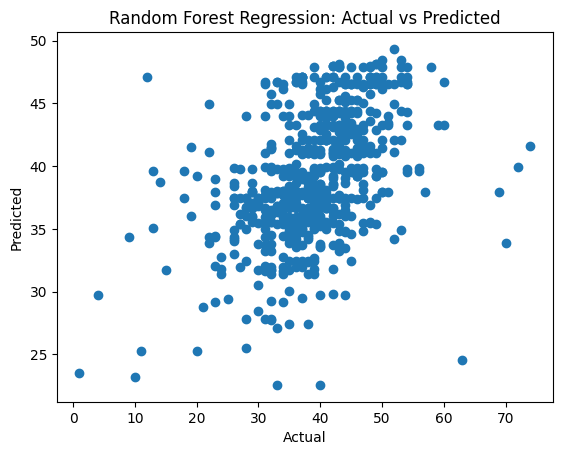

In [ ]:
# Visualize predictions against actual values
plt.scatter(y_test, rf_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.show()

In [ ]:
# Create a dictionary to store the model results
results = {
    'Model': ['Ridge Regression', 'Lasso Regression','Elastic Net',  'Support Vector Regression', 'Gradient Boosting', 'KNN', 'Random Forest'],
    'R-squared': [ridge_r2,lasso_r2 ,elastic_net_r2, svr_r2, gb_r2, rf_r2 , r2 ]
}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results)

# Print the table
print(results_df)

                       Model  R-squared
0           Ridge Regression   0.201998
1           Lasso Regression   0.113119
2                Elastic Net   0.104735
3  Support Vector Regression   0.187598
4          Gradient Boosting -20.113581
5                        KNN   0.181364
6              Random Forest  -0.039882
